# Gonorrhea Heterogeneous

$\dot{S_L(t)} = -\lambda_L * S_L(t) + r * I_L(t)$

$\dot{I_L(t)} = \lambda_L * S_L(t) - r * I_L(t)$

$\dot{S_H(t)} = -\lambda_H * S_H(t) + r * I_H(t)$

$\dot{I_H(t)} = \lambda_H * S_H(t) - r * I_H(t)$

$\lambda_L(t) = c_L * \beta_p * p(t)$

$\lambda_H(t) = c_H * \beta_p * p(t)$

$c_H = \frac{c_{mean} - c_L * n_L}{n_H}$

$g_H = \frac{c_H * n_H}{c_L * n_L + c_H * n_H}$

$g_L = 1 - g_H$

$p(t) = g_h * I_H(t) + g_L * I_L(t)$

With variables:

* $S$: Susceptibles
* $I$: Infective
* $\beta$: Transmission probability per partnership
* $r$: Recovery rate
* $c$: Partner change rate
* $p$: Probability of selecting an infected partner

## Model's Code

In [1]:
import aux
import model
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
warnings.filterwarnings("ignore",category=DeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 5]

/Users/sanchez.hmsc/miniconda3/envs/epimodelling/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


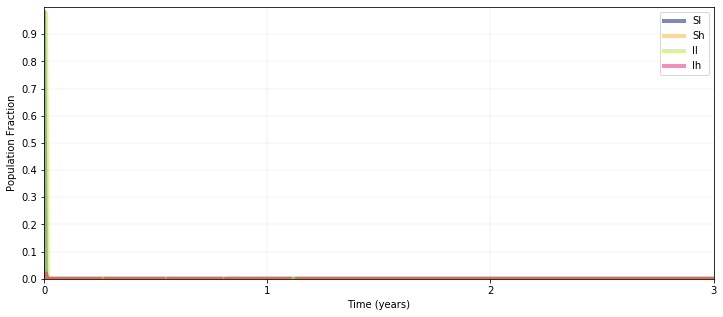

In [15]:
# User inputs ############################################################
(N, tmax) = (200000000, 15 * 12)
(nH, cM, cL) = (.02, 2/12, 1.4 / 12)
(beta, partRate, rec) = (.75, 1.5, 1 / 2)
(iInit) = (1)
# Internals ##############################################################
nL = 1 - nH
cH = (cM - cL * nL) / nH
gH = cH * nH / (cH * nH + cL * nL)
gL = 1 - gH
(sInit) = (N - iInit)
t = np.linspace(0, tmax, tmax * 10)
y0 = (N - N * nH, N * nH - iInit, 0, iInit)
# Run ####################################################################
ret = odeint(model.dGonorrheaHeterogeneous, y0, t, args=(N, beta, cL, cM, nH, nL, rec))
(Sl, Sh, Il, Ih) = ret.T / N
# Plot ###################################################################
tp = ((Sl, '#02146b', 'Sl'), (Sh, '#ffb428', 'Sh'), (Il, '#b4e830', 'Il'), (Ih, '#e21e7b', 'Ih'))
(fig, ax) = aux.plotEpiDynamicsPop(tp, t/12, tmax/12, 1)
ax.set_xticks(np.arange(0, tmax/12, 1))
ax.set_yticks(np.arange(0, 1, .1))
ax.set_ylim(0, 1)
ax.set_xlim(0, 3)
plt.grid(b=True, which='major', lw=.2, alpha=.5, color='#666666', linestyle='--')
# Save Figure ############################################################
plt.savefig(
    './img/Gonorrhea_Het.png',  
    dpi=500, pad_inches=.01, bbox_inches='tight'
)